# NLP with Spacy

In [ ]:
# token.i returns index of token

# Import the English language class
from spacy.lang.en import English
# Create the nlp object
nlp = English()

doc = nlp("It costs $5.")
print('Index: ',   [token.i for token in doc])
print('Text: ',    [token.text for token in doc])
print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc

In [ ]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

In [ ]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i+1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

## Loading Language Models


In [ ]:
# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

In [ ]:
# Load the 'de_core_news_sm' model – spaCy is already imported
nlp = spacy.load('de_core_news_sm')

text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

## Predicting linguistic annotations

In [ ]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

## Predicting Named Entities

In [ ]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

## Rule based matching
* works on doc objects and tokens not onlyu on strings

In [ ]:
[{'LEMMA':'buy'},{'POS':'NOUN'}]

In [ ]:
# Import the Matcher and initialize it with the shared vocabulary
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN', None, pattern)

# Use the matcher on the doc
matches = matcher(doc)
print('Matches:', [doc[start:end].text for match_id, start, end in matches])

In [ ]:
doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': 'iOS'}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

In [ ]:
doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{'LEMMA': 'download'}, {'POS': 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

In [ ]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

## Strings to Hashes

In [ ]:
# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings['cat']
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

In [ ]:
# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

## Docs and Spans

In [ ]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

In [ ]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

In [ ]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ['Oh', ',', 'really', '?', '!']
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

## From Scratch

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ['I', 'like', 'David', 'Bowie']
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

In [ ]:
# Get all tokens and part-of-speech tags
#pos_tags = [token.pos_ for token in doc]

for token in (doc):
    # Check if the current token is a proper noun
    if token.pos_ == 'PROPN':
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == 'VERB':
            print('Found a verb after a proper noun!')

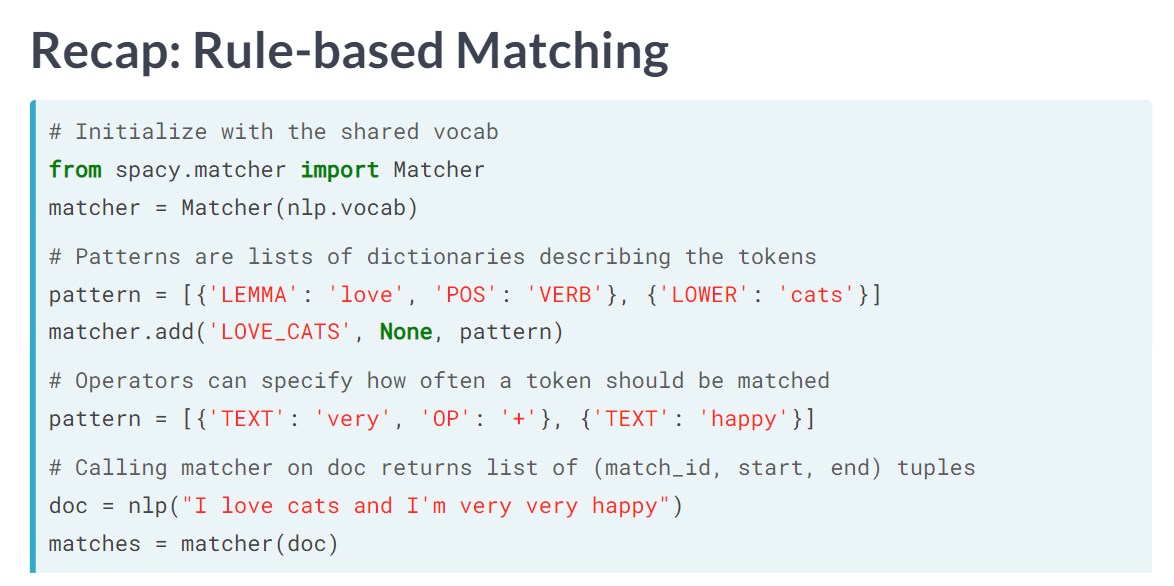

## Word Vectors and Similarity
* USeful for many apps, i e flagging duplicate sentences
* There is no definition of similarity
* Depends on the context

In [26]:
import spacy
# Load the en_core_web_md model
nlp = spacy.load('en_vectors_web_lg')

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[-2.2009e-01 -3.0322e-02 -7.9859e-02 -4.6279e-01 -3.8600e-01  3.6962e-01
 -7.7178e-01 -1.1529e-01  3.3601e-02  5.6573e-01 -2.4001e-01  4.1833e-01
  1.5049e-01  3.5621e-01 -2.1508e-01 -4.2743e-01  8.1400e-02  3.3916e-01
  2.1637e-01  1.4792e-01  4.5811e-01  2.0966e-01 -3.5706e-01  2.3800e-01
  2.7971e-02 -8.4538e-01  4.1917e-01 -3.9181e-01  4.0434e-04 -1.0662e+00
  1.4591e-01  1.4643e-03  5.1277e-01  2.6072e-01  8.3785e-02  3.0340e-01
  1.8579e-01  5.9999e-02 -4.0270e-01  5.0888e-01 -1.1358e-01 -2.8854e-01
 -2.7068e-01  1.1017e-02 -2.2217e-01  6.9076e-01  3.6459e-02  3.0394e-01
  5.6989e-02  2.2733e-01 -9.9473e-02  1.5165e-01  1.3540e-01 -2.4965e-01
  9.8078e-01 -8.0492e-01  1.9326e-01  3.1128e-01  5.5390e-02 -4.2423e-01
 -1.4082e-02  1.2708e-01  1.8868e-01  5.9777e-02 -2.2215e-01 -8.3950e-01
  9.1987e-02  1.0180e-01 -3.1299e-01  5.5083e-01 -3.0717e-01  4.4201e-01
  1.2666e-01  3.7643e-01  3.2333e-01  9.5673e-02  2.5083e-01 -6.4049e-02
  4.2143e-01 -1.9375e-01  3.8026e-01  7.0883e-03 -2

In [27]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8789265574516525


In [28]:
doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books" 
similarity = token1.similarity(token2)
print(similarity)

0.22325331


In [29]:
doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[12:15]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.751739242470527


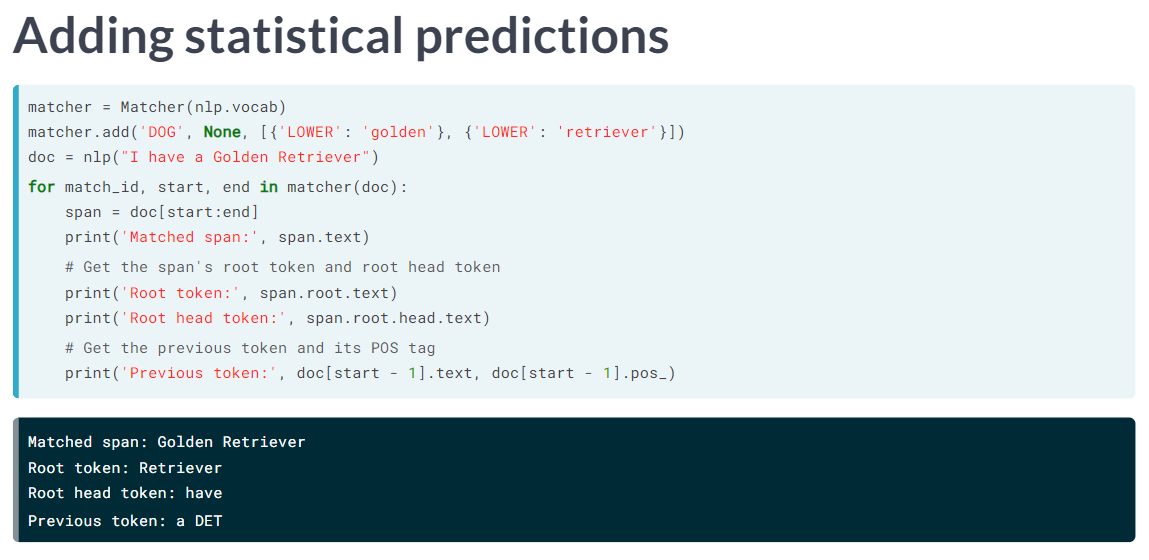

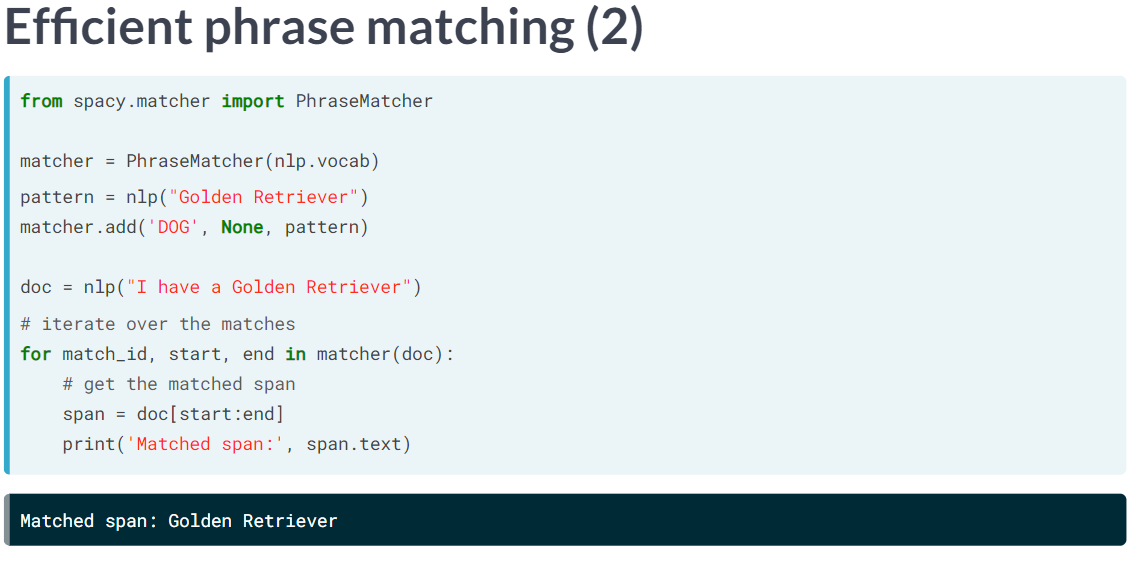

In [30]:
nlp = spacy.load('en_core_web_md')

In [31]:
# Create the match patterns
pattern1 = [{'LOWER': 'amazon'}, {'IS_TITLE': True, 'POS': 'PROPN'}]
pattern2 = [{'LOWER': 'ad'}, {'TEXT': '-'}, {'LOWER': 'free'}, {'POS': 'NOUN'}]

# Initialize the Matcher and add the patterns
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
matcher.add('PATTERN1', None, pattern1)
matcher.add('PATTERN2', None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

In [39]:
COUNTRIES= ['Afghanistan',
 'Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'United States Minor Outlying Islands',
 'Virgin Islands (British)',
 'Virgin Islands (U.S.)',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cabo Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'French Southern Territories',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Heard Island and McDonald Islands',
 'Holy See',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 "Côte d'Ivoire",
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macao',
 'Macedonia (the former Yugoslav Republic of)',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Mauritania',
 'Mauritius',
 'Mayotte',
 'Mexico',
 'Micronesia (Federated States of)',
 'Moldova (Republic of)',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Montserrat',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Niue',
 'Norfolk Island',
 "Korea (Democratic People's Republic of)",
 'Northern Mariana Islands',
 'Norway',
 'Oman',
 'Pakistan',
 'Palau',
 'Palestine, State of',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Pitcairn',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Kosovo',
 'Réunion',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Barthélemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Sint Maarten (Dutch part)',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Georgia and the South Sandwich Islands',
 'Korea (Republic of)',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Svalbard and Jan Mayen',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Taiwan',
 'Tajikistan',
 'Tanzania, United Republic of',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tokelau',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Wallis and Futuna',
 'Western Sahara',
 'Yemen',
 'Zambia',
 'Zimbabwe']

In [40]:
# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Namibia, Cambodia, Kuwait, Somalia, Haiti, Mozambique, Somalia, Rwanda, Singapore, Sierra Leone, Afghanistan, Iraq, Sudan, Congo, Haiti]


In [45]:
text="After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years \
than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more \
than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil \
War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa\
and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait.\
Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a \"\
false renaissance\" for the organization, given the more troubled missions that followed. Though the UN Charter had been\
written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of \
simultaneous, serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN \
mission in Somalia was widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu,\
and the UN mission to Bosnia faced \"worldwide ridicule\" for its indecisive and confused mission in the face of ethnic\
cleansing. In 1994, the UN Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision \
in the Security Council. Beginning in the last decades of the Cold War, American and European critics of the UN condemned \
the organization for perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his\
nation's funding from UNESCO (the United Nations Educational, Scientific and Cultural Organization, founded 1946) \
over allegations of mismanagement, followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from \
1992 to 1996, initiated a reform of the Secretariat, reducing the size of the organization somewhat. His successor,\
Kofi Annan (1997–2006), initiated further management reforms in the face of threats from the United States to withhold \
its UN dues. In the late 1990s and 2000s, international interventions authorized by the UN took a wider variety of forms.\
The UN mission in the Sierra Leone Civil War of 1991–2002 was supplemented by British Royal Marines, and the invasion \
of Afghanistan in 2001 was overseen by NATO. In 2003, the United States invaded Iraq despite failing to pass a UN \
Security Council resolution for authorization, prompting a new round of questioning of the organization's \
effectiveness. Under the eighth Secretary-General, Ban Ki-moon, the UN has intervened with peacekeepers in crises \
including the War in Darfur in Sudan and the Kivu conflict in the Democratic Republic of Congo and sent observers and \
chemical weapons inspectors to the Syrian Civil War. In 2013, an internal review of UN actions in the final battles of\
the Sri Lankan Civil War in 2009 concluded that the organization had suffered \"systemic failure\". One hundred and one UN \
personnel died in the 2010 Haiti earthquake, the worst loss of life in the organization's history. The Millennium Summit \
was held in 2000 to discuss the UN's role in the 21st century. The three day meeting was the largest gathering of world \
leaders in history, and culminated in the adoption by all member states of the Millennium Development Goals (MDGs), a\
commitment to achieve international development in areas such as poverty reduction, gender equality, and public health.\
Progress towards these goals, which were to be met by 2015, was ultimately uneven. The 2005 World Summit reaffirmed the\
UN's focus on promoting development, peacekeeping, human rights, and global security. The Sustainable Development Goals \
were launched in 2015 to succeed the Millennium Development Goals. In addition to addressing global challenges,\
the UN has sought to improve its accountability and democratic legitimacy by engaging more with civil society \
and fostering a global constituency. In an effort to enhance transparency, in 2016 the organization held its \
first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat António\
Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. \
Guterres has highlighted several key goals for his administration, including an emphasis on diplomacy for \
preventing conflicts, more effective peacekeeping efforts,\
and streamlining the organization to be more responsive and versatile to global needs."

In [49]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE" and overwrite the doc.ents
    span = Span(doc, start, end, label='GPE')
    doc.ents = list(doc.ents) + [span]
    
    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, '-->', span.text)


# works only with alpha version of spacy!


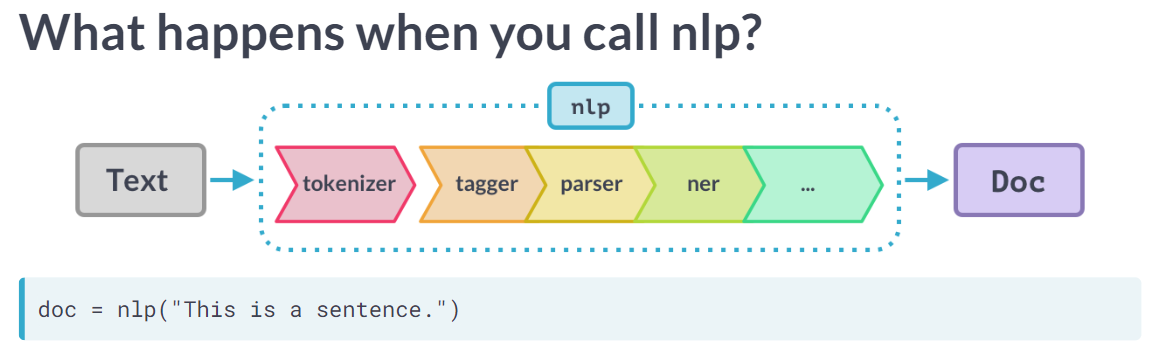


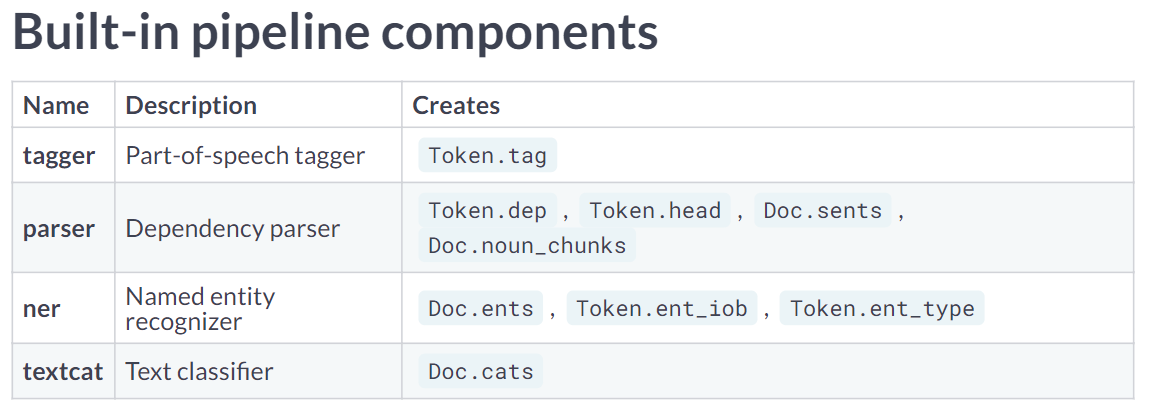